<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_rnn_islr_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [3]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [4]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [5]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [6]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [7]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [8]:
!wget https://github.com/takayama-rado/trado_samples/archive/master.zip

--2024-02-13 06:25:32--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-02-13 06:25:32--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [         <=>        ]  73.82M  20.4MB/s    in 3.6s    

2024-02-13 06:25:36 (20.4 MB/s) - ‘master.zip’ saved [77410707]



In [9]:
!unzip -o master.zip -d master

Archive:  master.zip
ad5d2655032e0c2e4c8df7e4dd6f3e71d5b65f5d
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [10]:
!mv master/trado_samples-main/src/modules_gislr .

In [11]:
!rm -rf master master.zip gislr_top10.zip

In [12]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [13]:
import json
import math
import sys
import time
from functools import partial
from pathlib import Path
from typing import (
    Any,
    Dict
)

# Third party's modules
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement RNN ISLR model

## RNN encoder

In [22]:
class RNNEncoder(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 num_layers,
                 activation,
                 bidir,
                 dropout,
                 apply_mask):
        super().__init__()

        # If num_layers = 1, we remove dropout option of RNN layers to avoid warning.
        rnn_dropout = 0.0 if num_layers == 1 else dropout

        self.rnn = nn.RNN(input_size=in_channels,
                          hidden_size=out_channels,
                          num_layers=num_layers,
                          nonlinearity=activation,
                          batch_first=True,
                          dropout=rnn_dropout,
                          bidirectional=bidir)
        # Dropout is added into intermediate RNN layers expect the last layer.
        # So, we add Dropout layer for the last layer explicitly.
        if dropout > 0:
            self.dropout = nn.Dropout(dropout)
        else:
            self.dropout = nn.Identity()

        self.apply_mask = apply_mask

    def forward(self, feature, feature_pad_mask=None):
        if feature_pad_mask is not None and self.apply_mask:
            tlength = feature_pad_mask.sum(axis=-1).detach().cpu()
            feature = nn.utils.rnn.pack_padded_sequence(
                feature, tlength, batch_first=True, enforce_sorted=False)

        hidden_seqs, last_hstate = self.rnn(feature)
        # Unpack hidden sequence.
        if isinstance(hidden_seqs, nn.utils.rnn.PackedSequence):
            hidden_seqs = nn.utils.rnn.unpack_sequence(hidden_seqs)
            # Back list to padded batch.
            hidden_seqs = nn.utils.rnn.pad_sequence(
                hidden_seqs, batch_first=True, padding_value=0.0)
        hidden_seqs = self.dropout(hidden_seqs)

        return hidden_seqs, last_hstate

## Update recognition head to apply masked global average pooling

In [23]:
class GPoolRecognitionHead(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels

        self.head = nn.Linear(in_channels, out_channels)
        self._init_weight()

    def _init_weight(self):
        nn.init.normal_(self.head.weight,
                        mean=0.,
                        std=math.sqrt(1. / self.out_channels))

    def forward(self, feature, feature_pad_mask=None):
        # Averaging over temporal axis.
        # `[N, C, T] -> [N, C, 1] -> [N, C]`
        if feature_pad_mask is not None:
            tlength = feature_pad_mask.sum(dim=-1)
            feature = feature * feature_pad_mask.unsqueeze(1)
            feature = feature.sum(dim=-1) / tlength.unsqueeze(-1)
        else:
            feature = F.avg_pool1d(feature, kernel_size=feature.shape[-1])
        feature = feature.reshape(feature.shape[0], -1)

        # Predict.
        feature = self.head(feature)
        return feature

## ISLR model

In [24]:
class RNNISLR(nn.Module):
    def __init__(self,
                 in_channels,
                 hidden_channels,
                 out_channels,
                 rnn_num_layers=1,
                 rnn_activation="tanh",
                 rnn_bidir=False,
                 rnn_dropout=0.1,
                 masking_type="both"):
        super().__init__()
        assert masking_type in ["none", "rnn", "head", "both"]

        self.linear = nn.Linear(in_channels, hidden_channels)
        self.activation = nn.ReLU()

        apply_mask = True if masking_type in ["rnn", "both"] else False
        self.rnn = RNNEncoder(
            in_channels=hidden_channels,
            out_channels=hidden_channels,
            num_layers=rnn_num_layers,
            activation=rnn_activation,
            bidir=rnn_bidir,
            dropout=rnn_dropout,
            apply_mask=apply_mask)

        if rnn_bidir:
            self.head = GPoolRecognitionHead(hidden_channels * 2, out_channels)
        else:
            self.head = GPoolRecognitionHead(hidden_channels, out_channels)

        self.masking_type = masking_type

    def forward(self, feature, feature_pad_mask=None):
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = feature.shape
        feature = feature.permute([0, 2, 1, 3])
        feature = feature.reshape(N, T, -1)

        feature = self.linear(feature)
        feature = self.activation(feature)

        hidden_seqs, last_hstate = self.rnn(feature, feature_pad_mask)[:2]

        # `[N, T, C'] -> [N, C', T]`
        feature = hidden_seqs.permute(0, 2, 1)

        if feature_pad_mask is not None and self.masking_type in ["head", "both"]:
            logit = self.head(feature, feature_pad_mask)
        else:
            logit = self.head(feature)
        return logit

## Sanity check

In [25]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/37779.hdf5')]


In [26]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [27]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

pre_transforms = Compose([trans_select_feature,
                          trans_repnan,
                          trans_norm])
transforms = Compose([ToTensor()])

In [28]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 75, 130])


In [29]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
hidden_channels = 64
out_channels = VOCAB
rnn_num_layers=2
rnn_bidir=True
rnn_dropout=0.1
masking_type="none"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)
torch.Size([2, 10])


# 4. Train and evaluation

## 4.1 Update training functions

In [30]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = 1
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using cpu for computation.


In [31]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 4.2 Compare RNN processing

### Default settings

In [32]:
rnn_num_layers = 2
rnn_bidir = True
masking_type = "none"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [33]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir = np.array(val_losses)
test_accs_stacked_bidir = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir.min()} at {np.argmin(val_losses_stacked_bidir)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir.max()} at {np.argmax(test_accs_stacked_bidir)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.651798 [    0/ 3881]
loss:2.004460 [ 3200/ 3881]
Done. Time:25.232042656000033
Training performance: 
 Avg loss:2.237586

Start validation.
Done. Time:0.6116373980000276
Validation performance: 
 Avg loss:2.075622

Start evaluation.
Done. Time:1.7048921189999646
Test performance: 
 Accuracy:27.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.046384 [    0/ 3881]
loss:1.991628 [ 3200/ 3881]
Done. Time:24.454863776000025
Training performance: 
 Avg loss:1.943330

Start validation.
Done. Time:0.6097089910000477
Validation performance: 
 Avg loss:1.912467

Start evaluation.
Done. Time:1.718532524000011
Test performance: 
 Accuracy:31.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.701408 [    0/ 3881]
loss:1.296988 [ 3200/ 3881]
Done

### Apply padding masking
#### RNN layer only

In [34]:
rnn_num_layers = 2
rnn_bidir = True
masking_type = "rnn"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [35]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir_masking_rnn = np.array(val_losses)
test_accs_stacked_bidir_masking_rnn = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir_masking_rnn.min()} at {np.argmin(val_losses_stacked_bidir_masking_rnn)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir_masking_rnn.max()} at {np.argmax(test_accs_stacked_bidir_masking_rnn)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.286741 [    0/ 3881]
loss:2.138714 [ 3200/ 3881]
Done. Time:29.211819088000084
Training performance: 
 Avg loss:2.187361

Start validation.
Done. Time:0.4787703950000832
Validation performance: 
 Avg loss:2.107994

Start evaluation.
Done. Time:1.9608284389998971
Test performance: 
 Accuracy:34.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.954489 [    0/ 3881]
loss:1.814154 [ 3200/ 3881]
Done. Time:29.666069418999996
Training performance: 
 Avg loss:1.881755

Start validation.
Done. Time:0.46466471400003684
Validation performance: 
 Avg loss:1.932531

Start evaluation.
Done. Time:1.5765683229999468
Test performance: 
 Accuracy:41.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.774061 [    0/ 3881]
loss:1.304249 [ 3200/ 3881]
Do

#### Head layer only

In [36]:
rnn_num_layers = 2
rnn_bidir = True
masking_type = "head"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [37]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir_masking_head = np.array(val_losses)
test_accs_stacked_bidir_masking_head = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir_masking_head.min()} at {np.argmin(val_losses_stacked_bidir_masking_head)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir_masking_head.max()} at {np.argmax(test_accs_stacked_bidir_masking_head)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.762238 [    0/ 3881]
loss:1.532624 [ 3200/ 3881]
Done. Time:49.9925769739998
Training performance: 
 Avg loss:1.859051

Start validation.
Done. Time:1.0195134450000296
Validation performance: 
 Avg loss:1.773265

Start evaluation.
Done. Time:1.960223348999989
Test performance: 
 Accuracy:29.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.266980 [    0/ 3881]
loss:1.103685 [ 3200/ 3881]
Done. Time:44.05307363200018
Training performance: 
 Avg loss:1.133503

Start validation.
Done. Time:0.6439867009999034
Validation performance: 
 Avg loss:1.578033

Start evaluation.
Done. Time:1.7945697489999475
Test performance: 
 Accuracy:48.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.245844 [    0/ 3881]
loss:0.660423 [ 3200/ 3881]
Done. T

#### Both layers

In [38]:
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type)
print(model)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [39]:
# Train, validation, and evaluation.
model.to(device)

val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model, device)
        test_accs.append(acc)
val_losses_stacked_bidir_masking_both = np.array(val_losses)
test_accs_stacked_bidir_masking_both = np.array(test_accs)
print(f"Minimum validation loss:{val_losses_stacked_bidir_masking_both.min()} at {np.argmin(val_losses_stacked_bidir_masking_both)+1} epoch.")
print(f"Maximum accuracy:{test_accs_stacked_bidir_masking_both.max()} at {np.argmax(test_accs_stacked_bidir_masking_both)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.398075 [    0/ 3881]
loss:1.533081 [ 3200/ 3881]
Done. Time:32.248588949000805
Training performance: 
 Avg loss:1.744140

Start validation.
Done. Time:0.8844500899995182
Validation performance: 
 Avg loss:1.621384

Start evaluation.
Done. Time:2.5135545189996265
Test performance: 
 Accuracy:38.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.116938 [    0/ 3881]
loss:0.965312 [ 3200/ 3881]
Done. Time:33.20559784800025
Training performance: 
 Avg loss:1.086096

Start validation.
Done. Time:0.5635051019999082
Validation performance: 
 Avg loss:1.346072

Start evaluation.
Done. Time:1.9054698760000974
Test performance: 
 Accuracy:54.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:0.551209 [    0/ 3881]
loss:0.989623 [ 3200/ 3881]
Done

#### Plot result

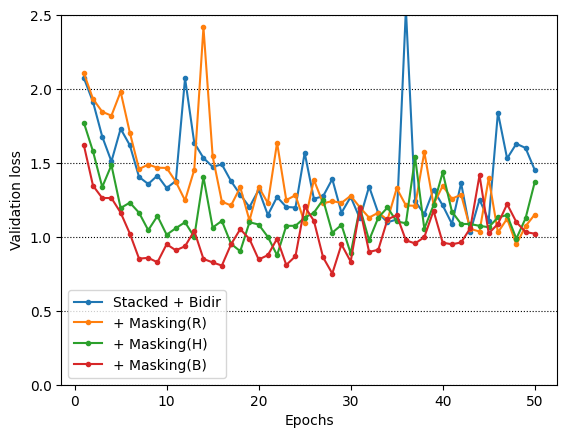

In [40]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_stacked_bidir)+1)
plt.plot(xs, val_losses_stacked_bidir, label="Stacked + Bidir", marker=".")
plt.plot(xs, val_losses_stacked_bidir_masking_rnn, label="+ Masking(R)", marker=".")
plt.plot(xs, val_losses_stacked_bidir_masking_head, label="+ Masking(H)", marker=".")
plt.plot(xs, val_losses_stacked_bidir_masking_both, label="+ Masking(B)", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

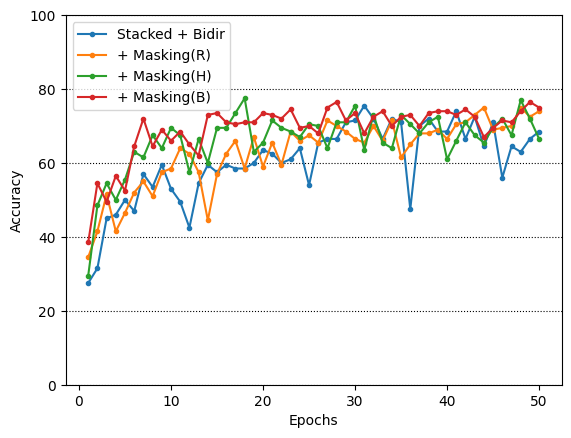

In [41]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_stacked_bidir)+1)
plt.plot(xs, test_accs_stacked_bidir, label="Stacked + Bidir", marker=".")
plt.plot(xs, test_accs_stacked_bidir_masking_rnn, label="+ Masking(R)", marker=".")
plt.plot(xs, test_accs_stacked_bidir_masking_head, label="+ Masking(H)", marker=".")
plt.plot(xs, test_accs_stacked_bidir_masking_both, label="+ Masking(B)", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()

In [42]:
print(f"Stacked + Bidir: {test_accs_stacked_bidir.max()}")
print(f"+ Masking(R): {test_accs_stacked_bidir_masking_rnn.max()}")
print(f"+ Masking(H): {test_accs_stacked_bidir_masking_head.max()}")
print(f"+ Masking(B): {test_accs_stacked_bidir_masking_both.max()}")

Stacked + Bidir: 75.5
+ Masking(R): 75.0
+ Masking(H): 77.5
+ Masking(B): 76.5
